# 鸢尾花数据集
## 问题分类
这个示例中演示的问题是一个监督学习问题（给出了具体的预测结果）

同时也是一个三分类的问题（分类的结果有三种）
## 导入数据集
CSDN上的jupyter notebook代码补全插件的地址：
https://blog.csdn.net/m0_45958387/article/details/125836163

没有nbextensions的解决方案：
https://blog.csdn.net/weixin_45671758/article/details/130109954

In [1]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [2]:
print(type(iris_dataset))
print('Keys of iris_dataset:\n{}'.format(iris_dataset.keys()))

<class 'sklearn.utils._bunch.Bunch'>
Keys of iris_dataset:
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [4]:
print(iris_dataset['DESCR'][:250])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Informati


## 初始数据

可以看到，data的部分是一个二维数组（ndarray）

然后target为每个样本的标签，0、1、2分别代表不同类型的花

feature_names即data的每一列的含义

In [5]:
print(iris_dataset['data'][:7])
print(iris_dataset['target'][:7])
print(iris_dataset['feature_names'])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]]
[0 0 0 0 0 0 0]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


接下来可以看看data的shape

In [7]:
print('Shape of data: \n{}'.format(iris_dataset['data'].shape))

Shape of data: 
(150, 4)


看看target的形状和数据

In [14]:
print('The shape of target is\n{}\nThe first five data of target is\n{}'\
      .format(iris_dataset['target'].shape, iris_dataset['target'][:5]))

The shape of target is
(150,)
The first five data of target is
[0 0 0 0 0]


## 进行数据集的划分
其中X_train和X_test分别代表输入的训练集和测试集

其中y_train和y_test分别代表输出标签的训练集和测试集

In [15]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

In [16]:
print('X_train shape: {}\ny_train shape: {}'.format(X_train.shape, y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [17]:
print('X_test shape: {}\ny_test shape: {}'.format(X_test.shape, y_test.shape))

X_test shape: (38, 4)
y_test shape: (38,)


## 观察数据
使用pandas的绘制散点图矩阵的函数`scatter_matrix`来绘制散点图矩阵，方便我们检查数据

鉴于种种原因，mglearn库用不了，就不能使用其预设颜色`cm3`，使用了ListedColorMap的替代方案

以下是对代码中使用的参数进行解释：

iris_dataframe：要绘制散点矩阵图的数据集，通常是一个 pandas 的 DataFrame 对象。

c=y_train：表示散点矩阵图中数据点的颜色。y_train 是一个数组，其中包含了每个数据点的类别或标签，它将作为颜色映射的输入。

figsize=(15, 15)：设置散点矩阵图的大小。这里设置为宽度和高度都为 15 英寸。

marker='o'：指定散点矩阵图中数据点的标记样式。这里使用圆形 'o'。

hist_kwds={'bins': 20}：用于设置直方图的参数。在散点矩阵图的对角线上，会绘制每个特征的直方图。这里将直方图的柱子数量设置为 20。

s=60：设置散点的大小。这里使用大小为 60 的散点。

alpha=.8：设置散点的透明度。这里设置为 0.8，表示相对较不透明。

cmap=cmap：用于设置颜色映射。cmap 是一个 ListedColormap 对象，用于将颜色映射到数据点的类别。

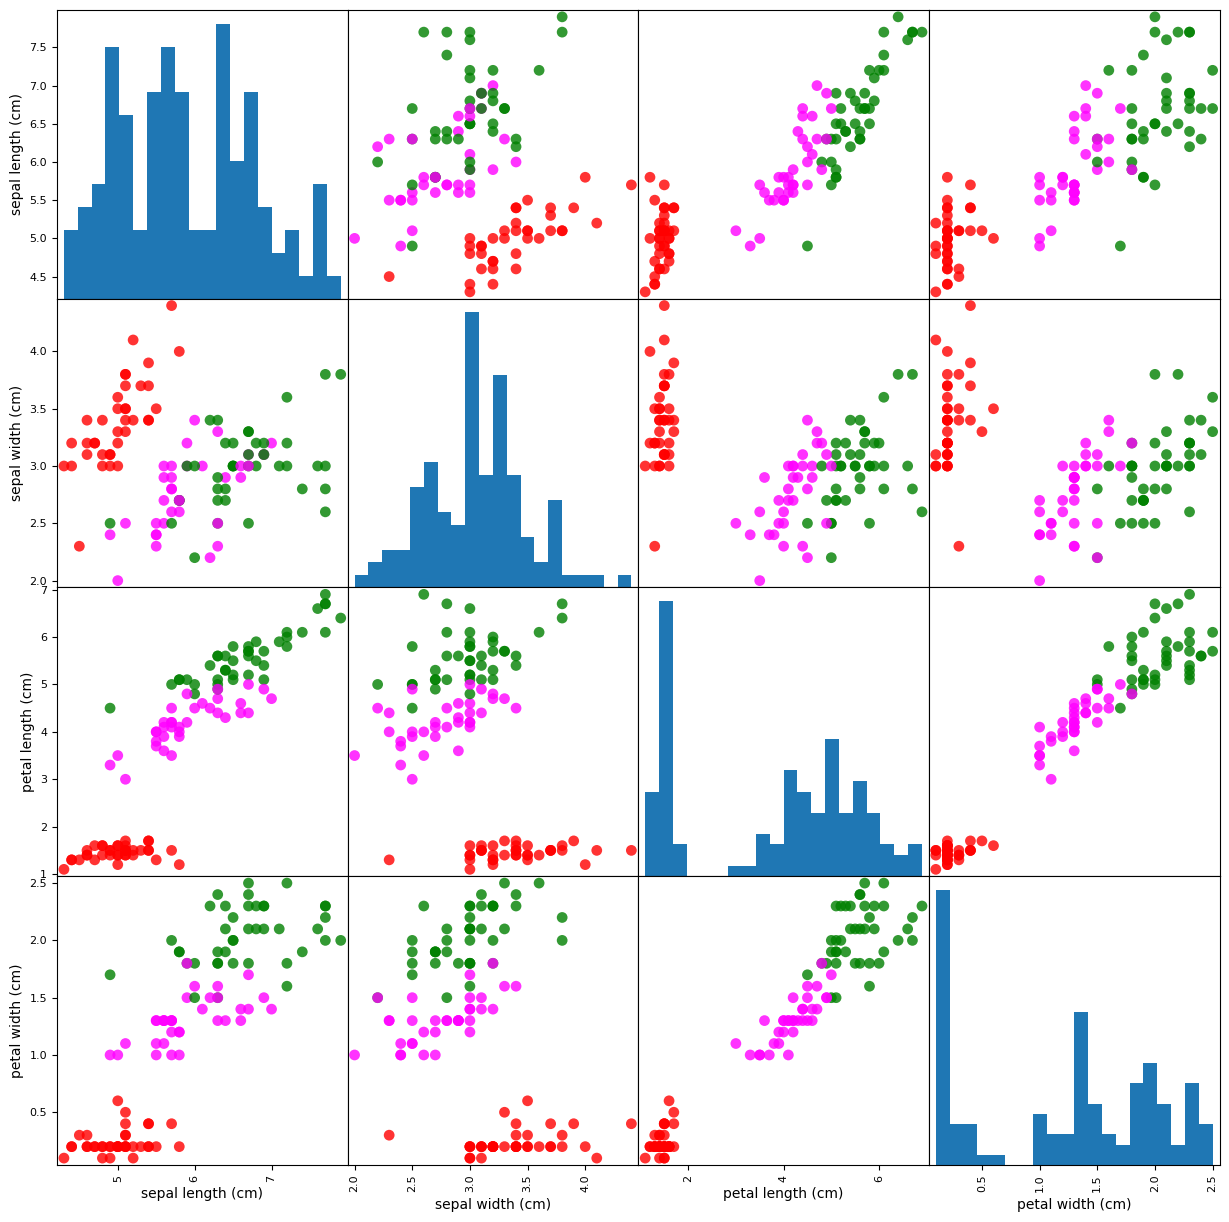

In [31]:
import pandas as pd
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

iris_dataframe = pd.DataFrame(X_train, columns = iris_dataset.feature_names)
#使用iris_dataset.feature_names中的字符串对数据列进行标记

# 定义3个不同的颜色
colors = ['#FF0000', '#FF00FF', '#008000']

# 根据数据的类别，设置对应的颜色
color_labels = [colors[label] for label in iris_dataset['target']]

# 创建颜色映射对象
cmap = ListedColormap(colors)

grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15), marker='o',
                        hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=cmap)

## 使用KNN算法进行拟合

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

上面的代码使用knn对算法进行了分装，令n为1

接下来对使用训练数据对模型进行拟合

In [33]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

## 作出预测
假设我们在野外发现的花的特征是5,2.9,1,0.2

先将其转为np的二维数组格式，**一定要是二维数组，因为scikit-learn的输入数据都必须是二维数组**

接下来对其品种做出预测

In [35]:
import numpy as np

X_new = np.array([[5, 2.9, 1, 0.2]])
print('X_new.shape: {}'.format(X_new.shape))

X_new.shape: (1, 4)


In [38]:
prediction = knn.predict(X_new)
print('Prediction: {}'.format(prediction))
print('Predicted target name: {}'.format(
    iris_dataset['target_names'][prediction]))
print(type(prediction))

#正是因为是ndarray的格式，所以输出的结果看起来像是一个列表

Prediction: [0]
Predicted target name: ['setosa']
<class 'numpy.ndarray'>


## 评估模型
接下来要评估其对测试集的预测程度

In [39]:
y_pred = knn.predict(X_test)
print(y_pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [40]:
print('Test set score: {:.2f}'.format(np.mean(y_pred==y_test)))

Test set score: 0.97


In [44]:
# 这里的(y_pred == y_test)尝试运行一下
# 从结果中可以看出，返回的是一个布尔数组，如果使用np.mean，相当于计算相等的比率，这里可以作为预测的正确率
print((y_pred==y_test))

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False]


### 测试集的精度
使用`knn.score(X_test, y_test)`可以直接得到测试集的精度

In [45]:
print(knn.score(X_test, y_test))

0.9736842105263158


## 尝试不同KNN的不同参数：n的值
接下来我将尝试使用不同的n参数，看看得到的结果的score会发生怎样的变化，并绘制成图表

In [47]:
result_scores = []
for n in range(10)[1:]:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    result_scores.append(knn.score(X_test, y_test))
print(result_scores)

[0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158, 0.9736842105263158]


啊，原来都一样啊，那没事了